<img src="https://farm66.staticflickr.com/65535/49055715328_092031af74_o.png"  width="150" />

<font size="5"> Photometric redshifts with Mixture Density Network
    
<font size="2">
    
This notebook was adapted from the one developed by Gabriel Teixeira for VI EAFexp I.A. Applications course - prof. Clécio R. Bom
<a href="www.clearnightsrthebest.com">clearnightsrthebest.com</a>
    
**Contact:** debom@cbpf.br</font>

<font size="2">

Please do not remove this disclaimer.</font>

In [1]:
from astropy.io import fits
import os
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd

def open_fits_catalog(fits_file):
    hdu_list=fits.open(fits_file, ignore_missing_end=True)
    #print hdu_list
    hdu = hdu_list[1]    # table extensions can't be the first extension, so there's a dummy image extension at 0
    #print hdu.header
    cat_table = Table(hdu.data)
    cols=hdu.columns
    return cat_table, cols

In [2]:
!wget -O specz_catalog_XIIIecbpf.fits https://www.dropbox.com/s/38zmuj2zxuoigzk/specz_catalog_XIIIecbpf.fits?dl=0

--2023-02-02 12:39:23--  https://www.dropbox.com/s/38zmuj2zxuoigzk/specz_catalog_XIIIecbpf.fits?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/38zmuj2zxuoigzk/specz_catalog_XIIIecbpf.fits [following]
--2023-02-02 12:39:24--  https://www.dropbox.com/s/raw/38zmuj2zxuoigzk/specz_catalog_XIIIecbpf.fits
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca55bf6b0745555271bd7d4dd0b.dl.dropboxusercontent.com/cd/0/inline/B1uI6lBYfwKpqhPdW9so7oqhJg2xiHoGicB37XxZbbQ5iIZmvoJcQGgKAaahKGds9d91g1DQIo8CNCYkfcRLAuS4ChbplbCPHP5jWeh4uVMPwG8kv67Q6r0vfxXyAbNMe9LSYq0d4FmJ71AlKNRBcCfIrepNG9JpslK1nZszpeQJkg/file# [following]
--2023-02-02 12:39:24--  https://uca55bf6b0745555271bd7d4dd0b.dl.dropboxusercontent.com/cd/0/inline/B1uI6lBYfwKpqhPdW9so7oqh

In [3]:
# dados_dir = '/home/dados229/gabriel/escolacbpf/'
# data_file = os.path.join(dados_dir, 'specz_catalog_ecbpf.fits')
data, _ = open_fits_catalog('specz_catalog_XIIIecbpf.fits')



In [5]:
data

ra,dec,class,z,zErr,petroMag_u,petroMagErr_u,petroMag_g,petroMagErr_g,petroMag_r,petroMagErr_r,petroMag_i,petroMagErr_i
float64,float64,str6,float64,float64,str8,str12,str8,str12,str8,str12,str8,str12
146.62282,-0.95138526,GALAXY,0.3711277,6.93721e-05,22.40671,0.9912677,20.32166,0.09126051,18.62304,0.03089815,18.05202,0.03665525
146.59272,-0.76025604,GALAXY,0.06495924,9.294928e-06,19.03327,0.089179,17.4961,0.01081754,16.91567,0.01007535,16.50206,0.01019981
146.9108,-0.074559356,GALAXY,0.2422717,8.594267e-05,20.18482,0.2964447,19.53431,0.08892172,18.03267,0.03387981,17.43746,0.04512536
146.44831,-0.71339967,GALAXY,0.1146981,7.54594e-06,18.94475,0.04721325,17.98683,0.009779428,17.451,0.009233744,17.02182,0.008778921
146.78847,-0.31065752,GALAXY,0.05656198,1.513238e-05,20.73877,0.4804843,18.73327,0.03666106,18.14503,0.03382286,17.86618,0.03925543
146.09369,-0.79308773,GALAXY,0.06758517,1.316565e-05,18.48178,0.07346264,16.76161,0.007395112,15.85149,0.005180169,15.43335,0.004949708
146.09369,-0.79308773,GALAXY,0.06762055,1.4237e-05,18.48178,0.07346264,16.76161,0.007395112,15.85149,0.005180169,15.43335,0.004949708
146.14358,-0.74164105,GALAXY,0.2038898,3.32915e-05,20.49585,0.5135037,18.16124,0.02850113,16.68983,0.01563277,16.16855,0.01662161
146.7517,-0.40839151,GALAXY,0.03580831,5.25862e-06,17.87275,0.03322654,16.57959,0.005243001,15.98186,0.005794456,15.66012,0.005502901


In [4]:
data = data[ ~  (np.array(data['petroMag_u']) == 'null    ')]
data = data[  (np.array(data['petroMag_u']).astype(float) > 0)]
data = data[  (np.array(data['petroMag_u']).astype(float) <  99)]
data = data[  (np.array(data['z']).astype(float) > 1e-2)]

<function matplotlib.pyplot.show(*args, **kw)>

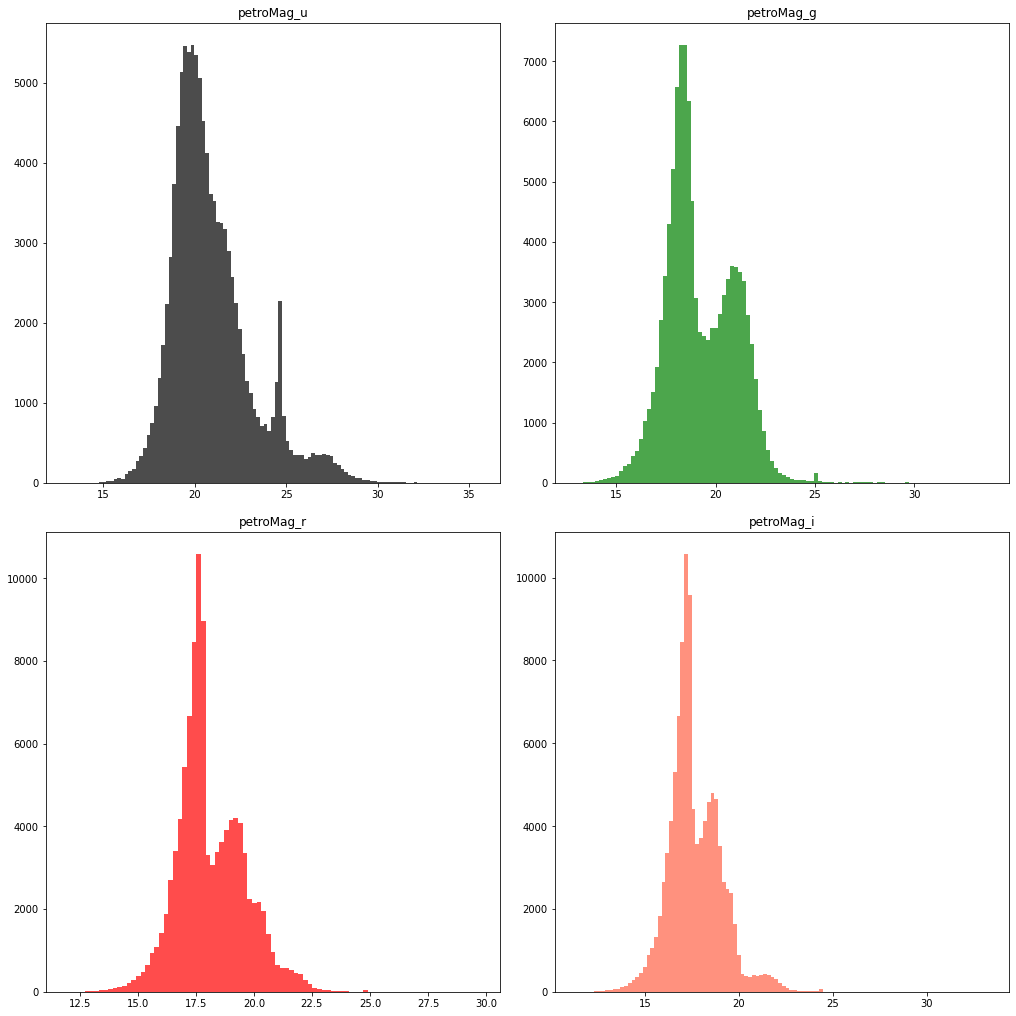

In [6]:
### MAG PLOTS

mags = ['petroMag_'+band for band in 'ugri']

key_list = mags 
color_list = ['black', 'green', 'red', 'tomato', 'palevioletred']
hor = 2
ver = 2

# plt.style.use('classic')

fig = plt.figure(figsize=(14, 14), constrained_layout=True)
gs = fig.add_gridspec(ver, hor, left=0.05, right=0.5, wspace=0.05)

i=0
binsize=0.2
def binarange(arr):
    return np.arange(min(arr), max(arr)+binsize, binsize)


for v in range(ver):
    for h in range(hor):
        if v==2:
            ax = fig.add_subplot(gs[v, 0])
            bins = binarange(data.field(key_list[i]).astype(float))
            ax.hist(data.field(key_list[i]).astype(float), bins=bins, color=color_list[i], alpha=0.7)
            ax.set_title(key_list[i])
            
            ax = fig.add_subplot(gs[v, 1])
            for c, key in enumerate(key_list):
                bins = binarange(data.field(key).astype(float))
                ax.hist(data.field(key).astype(float), bins=bins, color=color_list[c], alpha=1, label=key, histtype='step')
            ax.set_title("All Mags")
            plt.legend()
            
            break
            i+=1
        
        
        mags = ['petroMag_'+band for band in 'ugri']
        
        ax = fig.add_subplot(gs[v, h])
        bins = binarange(data.field(key_list[i]).astype(float))
        ax.hist(data.field(key_list[i]).astype(float), bins=bins, color=color_list[i], alpha=0.7)
        ax.set_title(key_list[i])
        i+=1

plt.show

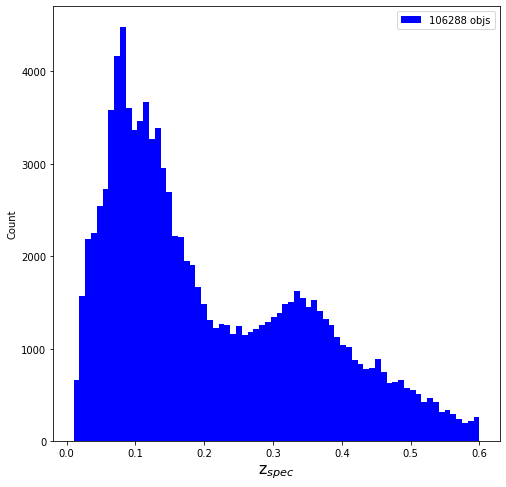

In [7]:
#ZSPEC PLOTS

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.hist(np.array(data.field('z')), bins=70, color='blue', label=f'{len(data)} objs')
ax.set_xlabel('z$_{spec}$', fontsize=16)
ax.set_ylabel('Count')
plt.legend()

In [8]:
#preprocessing

from sklearn.preprocessing import MinMaxScaler
np.random.seed(42)

train_percentual = 7/10
train_cut = np.random.uniform(0, 1, len(data)) < train_percentual
train_data = data[train_cut]

test_val_data = data[~train_cut]

test_percentual = 2/3
test_cut = np.random.uniform(0, 1, len(test_val_data)) < test_percentual

test_data = test_val_data[test_cut]
val_data = test_val_data[~test_cut]

print(f'Train Percent = {len(train_data)/len(data)*100:.2f}%')
print(f'Test Percent = {len(test_data)/len(data)*100:.2f}%')
print(f'Val Percent = {len(val_data)/len(data)*100:.2f}%')

#embaralhando os dados

train_shuffler = np.random.choice(len(train_data), len(train_data), replace=False)
train_data = train_data[train_shuffler]

test_shuffler = np.random.choice(len(test_data), len(test_data), replace=False)
test_data = test_data[test_shuffler]

val_shuffler = np.random.choice(len(val_data), len(val_data), replace=False)
val_data = val_data[val_shuffler]


x_train = np.array([train_data.field(mag) for mag in mags]).T
y_train = np.array(train_data.field('z'))

x_test = np.array([test_data.field(mag) for mag in mags]).T
y_test = np.array(test_data.field('z'))

x_val = np.array([val_data.field(mag) for mag in mags]).T
y_val = np.array(val_data.field('z'))

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

# np.max(x_test[:, 1])

Train Percent = 70.11%
Test Percent = 19.97%
Val Percent = 9.92%


In [20]:
import tensorflow_probability as tfp
import tensorflow.keras as tfk

def create_model(num_components, params_size, inp_shape, event_shape = [1]):
    inp = tfk.layers.Input(inp_shape)
    x = tfk.layers.Dense(100, activation='tanh')(inp)
        
        # x = keras.layers.Bidirectional(keras.layers.LSTM(600, return_sequences=True), merge_mode='concat')(x)
        # x = keras.layers.GlobalAveragePooling1D()(x)
    x = tfk.layers.Dense(128, activation='swish')(x)
    x = tfk.layers.Dense(params_size)(x)

    x = tfp.layers.MixtureNormal(num_components, event_shape)(x)

    model = tfk.models.Model(inp, x)
    return model


num_components = 20
event_shape = [1]
params_size = tfp.layers.MixtureNormal.params_size(num_components, event_shape)

model = create_model(num_components, params_size, inp_shape=x_train.shape[1:])

model.compile(loss=lambda y, model: -model.log_prob(y), optimizer=tfk.optimizers.Nadam(learning_rate=2e-4))





In [21]:

batch_size = 128
epochs = 60

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                     verbose=1, validation_data=(x_val,y_val))

# preds = regressor.predict(x_test)

Epoch 1/60
583/583 [==============================] - 5s 5ms/step - loss: -0.7975 - val_loss: -1.1335
Epoch 2/60
583/583 [==============================] - 2s 4ms/step - loss: -1.1812 - val_loss: -1.2220
Epoch 3/60
583/583 [==============================] - 2s 4ms/step - loss: -1.2521 - val_loss: -1.2588
Epoch 4/60
583/583 [==============================] - 2s 4ms/step - loss: -1.3033 - val_loss: -1.3150
Epoch 5/60
583/583 [==============================] - 2s 4ms/step - loss: -1.3559 - val_loss: -1.3700
Epoch 6/60
583/583 [==============================] - 3s 4ms/step - loss: -1.3998 - val_loss: -1.3723
Epoch 7/60
583/583 [==============================] - 2s 4ms/step - loss: -1.4421 - val_loss: -1.4574
Epoch 8/60
583/583 [==============================] - 2s 4ms/step - loss: -1.4778 - val_loss: -1.4839
Epoch 9/60
583/583 [==============================] - 2s 4ms/step - loss: -1.5115 - val_loss: -1.5351
Epoch 10/60
583/583 [==============================] - 2s 4ms/step - loss: -1.5397

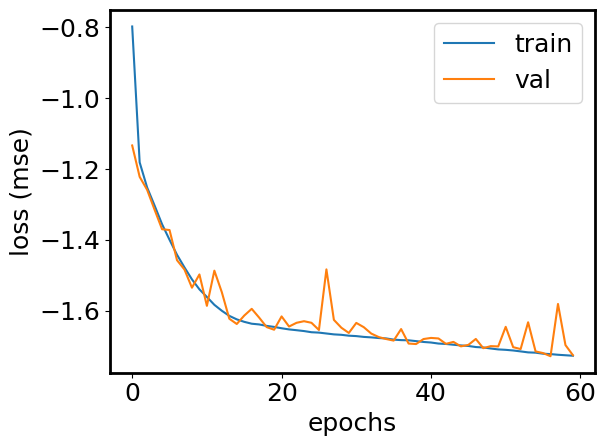

In [22]:
# TRAINING PLOTS

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='train')
plt.plot(val_loss, label='val')
plt.xlabel('epochs')
plt.ylabel('loss (mse)')
plt.legend()
plt.tight_layout()

In [23]:
gm = model(x_test)

gm_weights = gm.mixture_distribution.probs_parameter().numpy()
gm_means = np.squeeze(gm.components_distribution.mean().numpy())
gm_std = np.squeeze(np.sqrt(gm.components_distribution.variance().numpy()))


In [24]:

zaxis = np.linspace(0, 1, 1000)

My_gm = {}
My_PDFs = np.zeros( (len(x_test), len(zaxis)) )
My_Photoz = np.zeros(len(x_test))

for i in range(len(x_test)):

    My_gm[str(i)] = tfp.distributions.MixtureSameFamily(
            mixture_distribution=tfp.distributions.Categorical(probs=gm_weights[i]),
            components_distribution=tfp.distributions.Normal(
                loc=gm_means[i],       
                scale=gm_std[i]))
    My_PDFs[i] = My_gm[str(i)].prob(zaxis)
    My_Photoz[i] = zaxis[np.argmax(My_PDFs[i])]


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeW

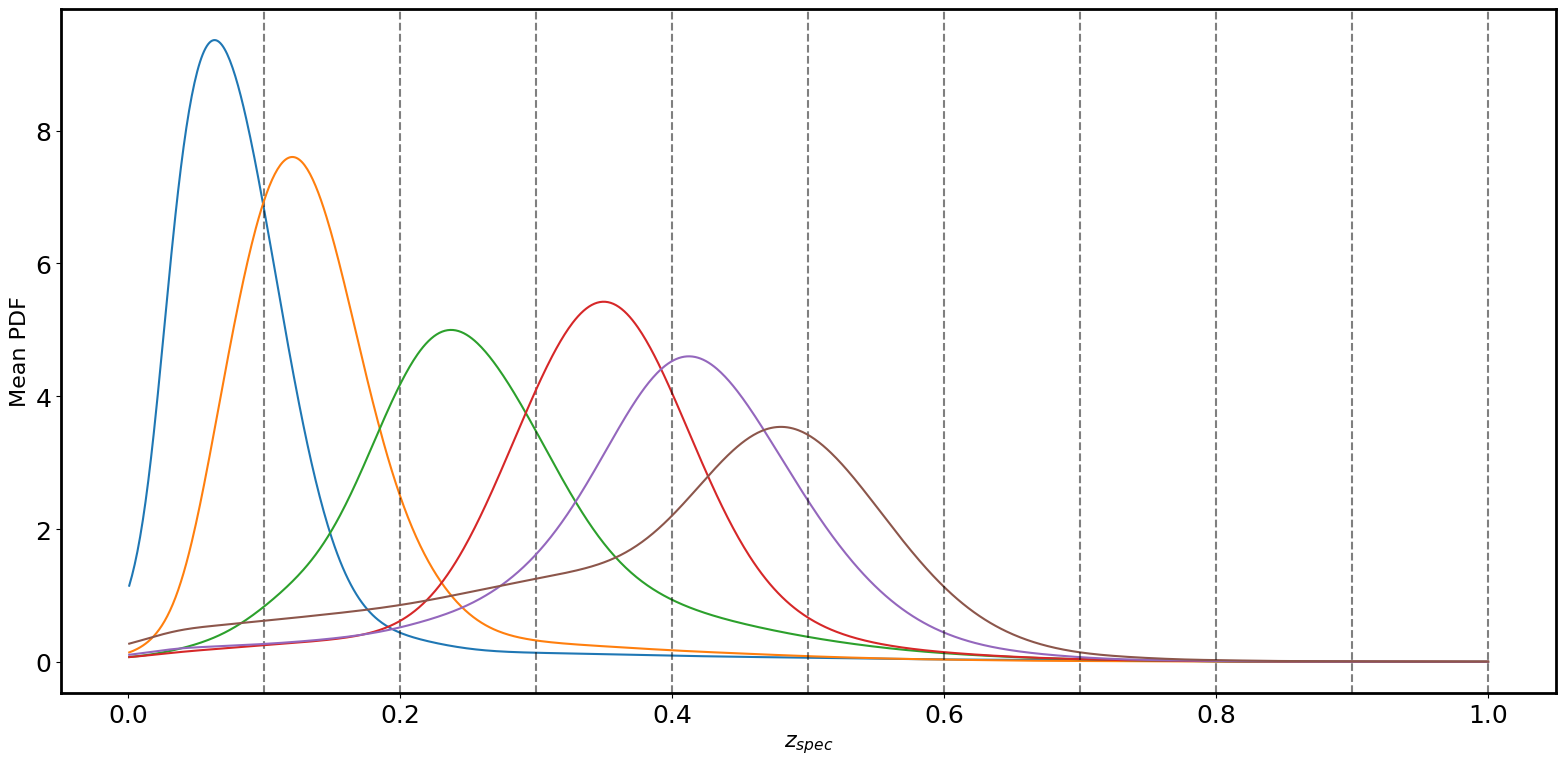

In [25]:
fig = plt.figure(figsize=(16,8))
zstep = 0.1
zaxis = np.linspace(0.001, 1, 1000)
for z in np.arange(0,1,zstep):

    inrange_train = np.where(np.logical_and(y_test>z, y_test<=z+0.1))[0]

    train_pdfs_bin =  My_PDFs[np.array(inrange_train)]
    plt.plot(zaxis,np.mean(train_pdfs_bin, axis=0))
    plt.axvline(z+zstep, ls='--', alpha=0.5, c='k')
plt.xlabel('$z_{spec}$', fontsize=16)
plt.ylabel('Mean PDF', fontsize=16)
plt.tight_layout()

In [15]:
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, ax = None,fig=None,
                    sort = True, bins = 20, alpha = 0.05,
                    s=0.8,marker='o', out_name="testedense.png",
                    save=False, color_bar=True, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    from scipy.stats import gaussian_kde

    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins)

    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False )

    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]
    
    cax=ax.scatter( x, y, c=z,s=s,alpha=alpha )
    if color_bar==True: 
        fig.colorbar(cax,ax=ax)

    if save==True:
        plt.savefig(out_name)

    return ax

def get_zstatistic(zspec,zphot):
    
    deltaz = zphot - zspec
    mean_bias = np.mean(deltaz)

    median_bias=np.percentile(deltaz,50)
    
    p16=np.percentile(deltaz,15.85)
    p84=np.percentile(deltaz,84.05)
    sigma68=0.5*(p84-p16)
    
    return mean_bias,median_bias,sigma68

def get_photo_z_bias(zspec, zphot):

    return np.median(delta_z/(1.0+zspec))

def get_sigmaNMAD(zspec,zphot):
    
    delta_z = zphot-zspec
    median_delta_z=np.median(delta_z)
    argument=(delta_z-median_delta_z)/(1.0+zspec)
    sigmaz=1.48*np.median(np.absolute(argument))
    return sigmaz 


def metrics_text(zspec, zphot):
    
    sigmaz = get_sigmaNMAD(zspec,zphot)
    mean_bias,median_bias,sigma68 = get_zstatistic(zspec,zphot)
    outfrac = np.sum( np.abs(zphot-zspec)/(1+zspec) > 0.15 )/len(zphot)
    
    text="$\sigma_{NMAD}$: $"+str(round(sigmaz,3))+"$"
    text+="\n $\sigma_{68}$: $"+str(round(sigma68,3))+"$"
    text+="\n Mean Bias: $"+str(round(mean_bias,3))+"$"
    text+="\n Median Bias: $"+str(round(median_bias,3))+"$"
    text+="\n Number of objects: $"+str(len(zspec))+"$"
    text+="\n Outlier Frac: $"+str(round(outfrac, 3))+"$"
    return text

def frac_dev(zspec, zphot):
    delta = zphot - zspec
    frac = delta/(1+zspec)
    return frac

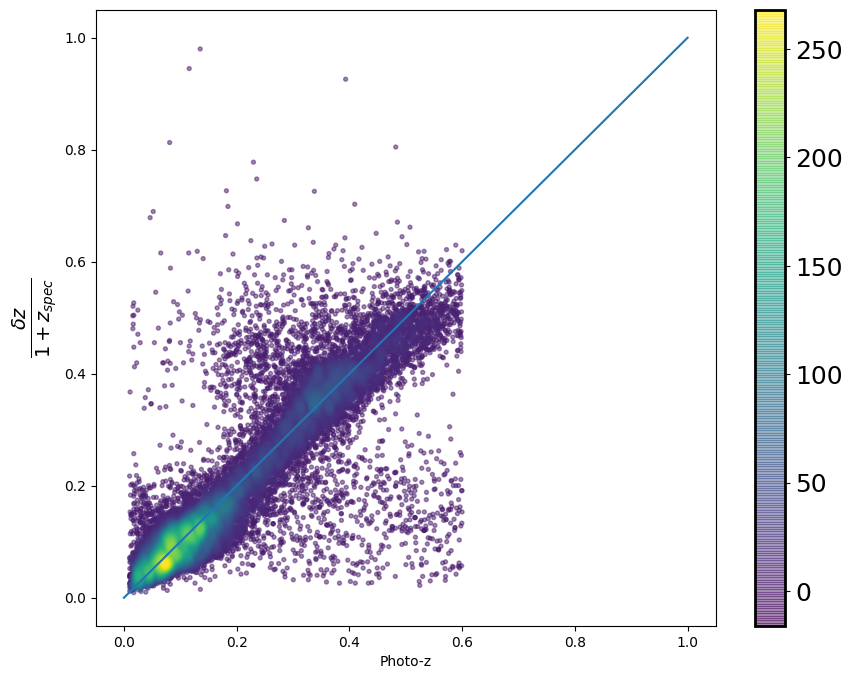

In [27]:
plt.style.use('default')

fig = plt.figure(figsize=(10,8))
ax = fig.subplots()
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelcolor'] = 'black'
ax.set_ylabel(r'$\frac{\delta z}{1+z_{spec}}$', fontsize=20)
ax.set_xlabel('Photo-z')




zbins=[np.arange(0,.7,0.01),60]

ax.plot([0,1], [0,1], )
density_scatter(y_test, My_Photoz,
                           ax = ax,fig=fig, bins = zbins, alpha = 0.5,
                           s=8,marker='o', save=True, out_name='delta_dense_scatteraaa.png')
# plt.clf()
plt.show()

PLOTING PDF METRICS...
vai calcular PIT
vai calcular odds
vai plotar
Plot will be saved in current directory as PIT_ODDS_QQ_Hexbin.pdf


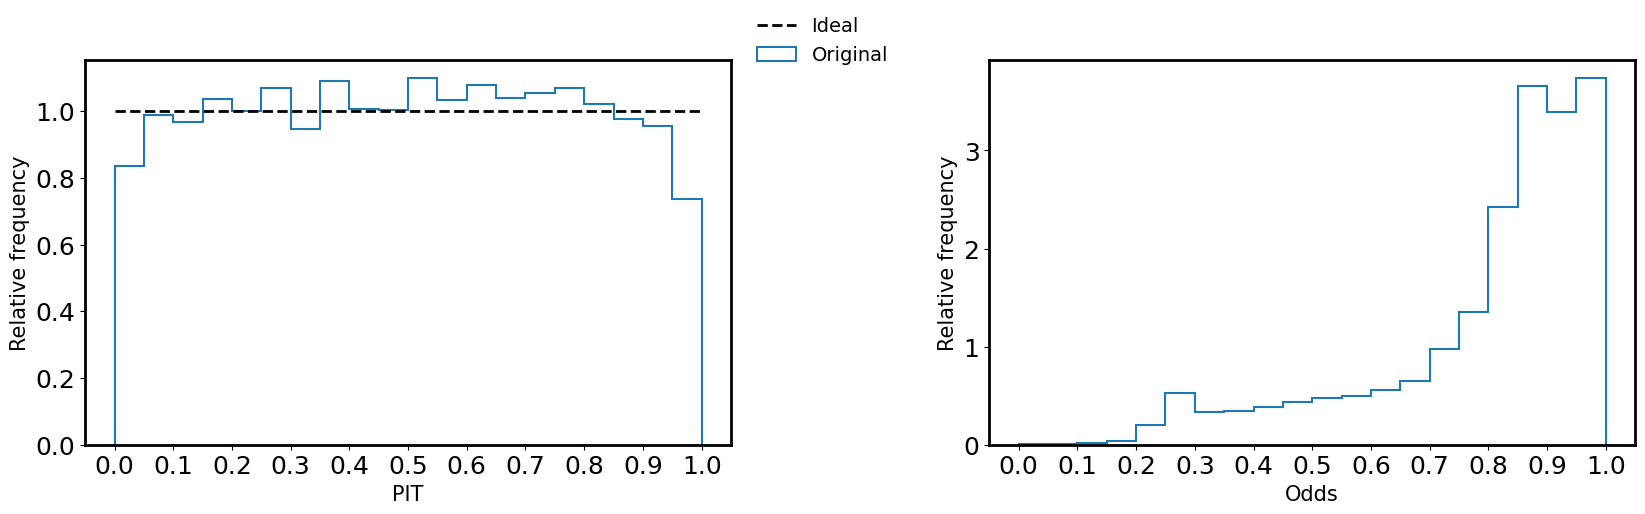

In [28]:
def PDF_Metrics_Plot(Spec_Z, Photo_Z, PDF_List, z_axis=np.linspace(0.001, 1, 2000), out_dir='', ax1=None, ax2=None, fig=None, label='MDN'):
    """
    Function to calculate relevant metrics to benchmark probability distribution functions
    
    PIT: Probability integral transform. Offers a benchmark of the calibration of the PDFs, 
    where the ideal case (with perfectly calibrated PDFs) is represented by a uniform distribution.
    A U-shaped histogram indicates overly narrow PDFs. A \hat shaped histogram indicates overly
    broad PDFs. A positive slope indicates positive bias while a negative slope indicates negative
    bias.
    
    Calculated as the integral of the PDF between 0 and the spectrocopic redshift of the object.
    Source: arXiv:1608.08016

    Odds: Parameter that represents the fraction of a single PDF that is contained in a given
    interval around the peak. The interval is defined as the expected precision of photo-zs
    in the local universe (0.02) as per arXiv:1907.06315

    Parameters
    ----------
    Spec_Z:   numpy.ndarray containing the spectroscopic redshifts of the sample. 
              Shape (N,), where N is the number of samples.
              
    Photo_Z:  numpy.ndarray containing the photometric redshifts of the sample. 
              Shape (N,)
              
    PDF_List: numpy.ndarray containing the PDFs of each object in the sample. 
              Shape (N, M), where M is the number of points in the PDF.
    """
    
    x = z_axis
    print('vai calcular PIT')
    PIT = []
    for i in range(len(Spec_Z)):
        X_Interval = x[np.where(x < Spec_Z[i])]
        Y_Interval = PDF_List[i][np.where(x < Spec_Z[i])]
        PIT.append(np.trapz(Y_Interval, X_Interval))
        
    QQs = []
    for i in np.arange(0, 1.01, 0.01):
        QQs.append(np.quantile(PIT, i))
    print('vai calcular odds')
    x_s = pd.Series(x)
    Odds = []
    for i in range(len(Spec_Z)):

        Peak_Z_Odd = x[PDF_List[i].argmax()]
        X_Interval = x[ (x>=Peak_Z_Odd-0.06)*(x<=Peak_Z_Odd+0.06) ]
        Y_Interval =PDF_List[i][(x>=Peak_Z_Odd-0.06)*(x<=Peak_Z_Odd+0.06)]
        Odds.append(np.trapz(Y_Interval, X_Interval))
    
    print('vai plotar')
    
    import matplotlib.gridspec as gridspec

    if fig==None:
        fig = plt.figure(figsize=(20,10))
        plt.subplots_adjust(wspace=0.4, hspace=.3)
        gs = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)
    
    if ax1==None:
        ax_PIT = fig.add_subplot(gs[0, 0:2])
    else:
        ax_PIT = ax1
    ax_PIT.hist(PIT, bins=20, range=(0,1), density=True, histtype='step', lw=1.5, label=label)
    ax_PIT.set_ylabel('Relative frequency', fontsize=15)
    ax_PIT.set_xlabel('PIT', fontsize=15)
    ax_PIT.set_xticks(np.arange(0, 1.1, 0.1))

    if ax2==None:
        ax_ODDS = fig.add_subplot(gs[1, 0:2])
    else:
        ax_ODDS = ax2
    ax_ODDS.hist(Odds, bins=20, range=(0,1), density=True, histtype='step', lw=1.5)
    ax_ODDS.set_ylabel('Relative frequency', fontsize=15)
    ax_ODDS.set_xlabel('Odds', fontsize=15)
    ax_ODDS.set_xticks(np.arange(0, 1.1, 0.1))

    fig.align_ylabels([ax_PIT, ax_ODDS])
    print('Plot will be saved in current directory as PIT_ODDS_QQ_Hexbin.pdf')

    return ax_PIT,ax_ODDS


z_axis = zaxis

print('PLOTING PDF METRICS...')
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.4, hspace=.3)
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax_PIT = fig.add_subplot(gs[0, 0])
ax_ODDS = fig.add_subplot(gs[0, 1])

ax_PIT, ax_ODDS =Calc_and_Plot_PIT_Odds_QQ_Hexbin(y_test, My_Photoz,
                                         My_PDFs, z_axis, ax1=ax_PIT, ax2=ax_ODDS, fig=fig, label='Original')

ax_PIT.plot([0,1], [1,1], '--', color='black', lw=2, label='Ideal')
handles, labels = ax_PIT.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',  frameon=False, fontsize=14)
plt.show()